In [1]:
import numpy as np
import pandas as pd
import yfinance as yf # 야후 바이낸스의 차트의 주가 정보를 가져옴.
import warnings

import riskfolio as rp
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore") # 경고 메시지 무시
pd.options.display.float_format = '{:.4%}'.format # 실수 x를 받아 소수점 넷째자리까지만 표현

start = '2016-01-01'
end = '2019-12-30'

assets = ['JCI', 'TGT', 'CMCSA', 'CPB']
assets.sort()

data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

model = 'Classic' # Model은 BL (Black Litterman) OR FM (Factor Model)
rm = 'MV' # Risk Measure가 사용됨 (지금은 분산 사용)
obj = 'Sharpe' # 샤프를 구하려고 함. MinRisk, MaxRet, Utility 가능
hist = True # 역사적 시나리오 사용
rf = 0 # Risk free rate은 0으로 가정
l = 0 # Risk aversion factor(Util일때만 사용 가능)

[*********************100%***********************]  4 of 4 completed


In [9]:
port = rp.Portfolio(returns = Y)

method_mu = 'hist' # Expected returns based on historical data.
method_cov = 'hist' # Covariance matrix based on historical data.

port.assets_stats(method_mu = method_mu, method_cov = method_cov, d = 0.94)

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T)

,CMCSA,CPB,JCI,TGT
weights,41.4289%,1.3887%,22.8071%,34.3753%


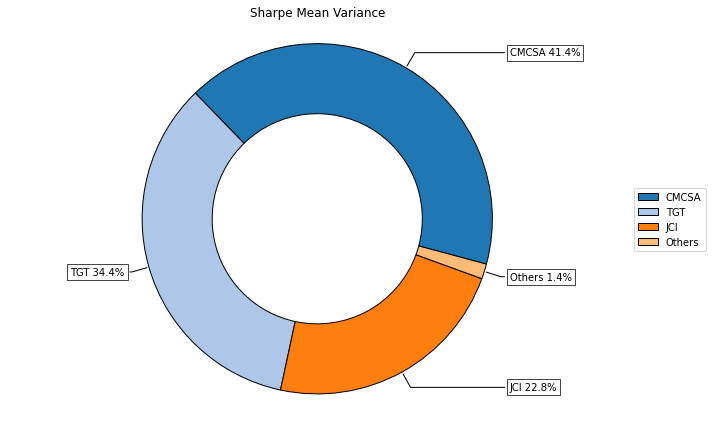

In [10]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [6]:
points = 50 # Frontier에 있는 포인트의 수
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)    
display(frontier.T.head())

,CMCSA,CPB,JCI,TGT
0,32.1713%,26.7299%,25.2324%,15.8665%
1,35.4871%,17.6563%,24.3639%,22.4927%
2,36.8817%,13.8361%,23.9989%,25.2833%
3,37.9703%,10.8608%,23.7166%,27.4523%
4,38.8970%,8.3206%,23.4720%,29.3103%


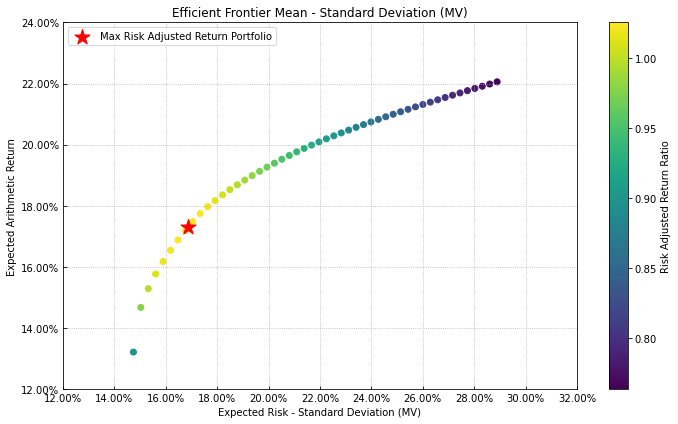

In [11]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                  rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                  marker='*', s=16, c='r', height=6, width=10, ax=None)

In [12]:
rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']
w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
w_s.columns = rms
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')
    


,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
CMCSA,41.43%,40.39%,39.32%,38.63%,39.26%,36.04%,29.54%,30.27%,51.40%,54.44%,36.29%,52.69%,42.02%
CPB,1.39%,0.76%,2.70%,1.57%,2.93%,2.09%,17.06%,26.96%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,22.81%,14.92%,19.92%,15.58%,20.02%,26.39%,27.06%,16.26%,17.34%,13.49%,18.01%,13.92%,16.58%
TGT,34.38%,43.92%,38.06%,44.21%,37.79%,35.48%,26.34%,26.51%,31.26%,32.07%,45.70%,33.38%,41.40%


<AxesSubplot:>

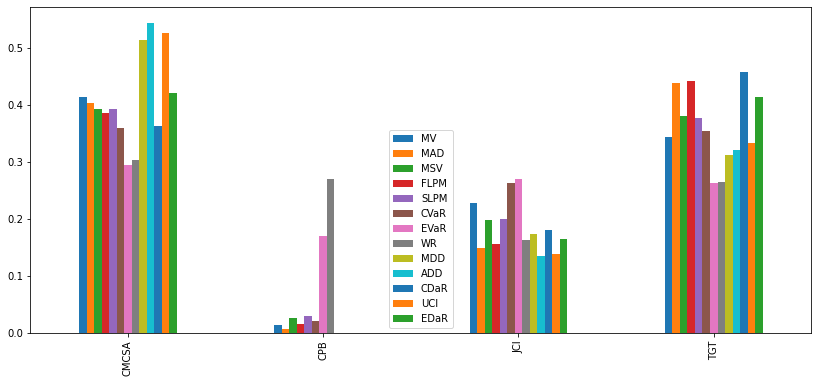

In [13]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)